# **Email Spam Classification using K-Nearest Neighbours** 

kNN is a supervised Machine Learning technique that can handle both regression and classification.

**How kNN Works**

kNN algorithm borrows on actual life, where our behaviour is impacted by those surrounding us. 

1. When we have 1 close best friend we end up having similar interests with them (K = 1).

2. When we have 5 close friends we end up picking habits from each one of them and we become an average of 5 (K = 5).

kNN classifier identifies the class of a data point using the majority voting principle. If k is set to 5, the classes of 5 nearest points are examined. Prediction is done according to the predominant class. Similarly, kNN regression takes the mean value of 5 nearest locations.

The distance between the data points is measured by the **Euclidean Distance** technique. 

# 1. Importing the required modules

In [11]:
#Importing the required modules

# read the data
import pandas as pd

# for manual selection of train, test data:
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from numpy.random import randint

# automatic splitting of data to train, test data:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# visualizing the data
import matplotlib.pyplot as plt

# 2. Generating the email spam classification dataset

In [3]:
# import dataset (emails.csv) to google colab from drive.

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# To read the contents of the file

emails = pd.read_csv('/content/gdrive/My Drive/emails.csv')

# 3. Creating a function to calculate the Eucledian Distance

In [5]:
#Euclidean Distance
def euclidean(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

The function will calculate the distance from p1 point to p2 point

# 4. Creating a `predict` function; Manual Splitting of Dataset to Training, Testing Data

In [6]:
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = euclidean(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances)
            
        point_dist = np.array(point_dist) 
        
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

The function saves the distance of each point of the dataset from the new data point and sorts out the data. Finally, it selects the class for the new data point with the majority class.

# 5. Test the `predict` function on emails dataset  

In [25]:
X = emails.iloc[:, 1:-1].values
y = emails.iloc[:, -1].values


#Creating the training Data
train_idx = randint(0,len(X),len(X))
X_train = X[train_idx[:int(len(train_idx)*.7)]]
y_train = y[train_idx[:int(len(train_idx)*.7)]]
 
#Creating the testing Data
X_test = X[train_idx[int(len(train_idx)*.7):]]
y_test = y[train_idx[int(len(train_idx)*.7):]]
 
#Applying our function 
y_pred = predict(X_train,y_train,X_test , 2)
 
#Checking the accuracy
accuracy_score(y_test, y_pred)

0.916881443298969

After creating the `predict` function to find the prediction for a bunch of new data points, Let’s use our `predict` function to get the emails' dataset’s prediction, using different K values.

After running the test 5 times with different K values, K value of 2 got the highest accuracy score of 0.916

# 6. Visualizing the dataset

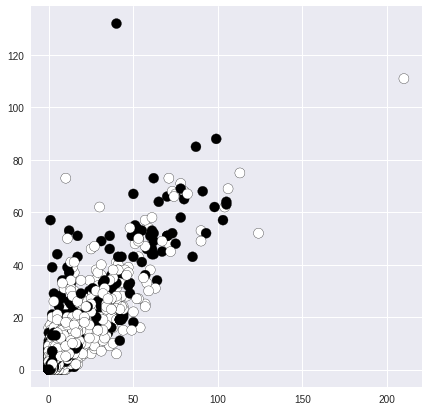

In [8]:
plt.style.use('seaborn')
plt.figure(figsize = (7,7))
plt.scatter(X[:,0], X[:,1], c=y,s=100, edgecolors='black')
plt.show()

# 7. Splitting data to training, testing datasets using `train_test_split`

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 8. KNN Classifier Implementation

In [12]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=2)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn7 = KNeighborsClassifier(n_neighbors=7)

We are building KNN Classifier Objects, by developing serveral Classifiers with different K values for comparison.

The models are then trained using a train set. The k value is chosen using the `n_neighbors` argument.

# 9. Predictions for the KNN Classifiers

In [26]:
# Comparison between training, test models

knn1.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn5.fit(X_train, y_train)
knn7.fit(X_train, y_train)

y_pred_1 = knn1.predict(X_test)
y_pred_2 = knn2.predict(X_test)
y_pred_5 = knn5.predict(X_test)
y_pred_7 = knn7.predict(X_test)

In the test set, we forecast the target values and compare them to the actual values.

# 10. Generate Accuracy scores for all K values 

In [14]:
# Getting the accuracy scores

print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)
print("Accuracy with k=2", accuracy_score(y_test, y_pred_2)*100)
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=7", accuracy_score(y_test, y_pred_7)*100)

Accuracy with k=1 85.76952822892498
Accuracy with k=2 87.23897911832947
Accuracy with k=5 85.76952822892498
Accuracy with k=7 85.84686774941996


# Limitations of kNN

1. Is not ideal for large- dimensional datasets
2. Uses alot of memory and time when predicting larger datasets 